In [2]:
import os
import numpy as np
import pandas as pd
import json
# import matplotlib.pyplot as plt
# %matplotlib inline
# from IPython.core.pylabtools import figsize


In [8]:
corpus_dir = "/home/naraki/dialogsum/corpus"
print(os.listdir(corpus_dir))

['train.json', 'val.json', 'README.txt', 'train.tsv', 'val.tsv', 'test.json', 'licence.txt', 'test.tsv']


In [7]:
df_train = pd.read_table(os.path.join(corpus_dir, "train.tsv"))
df_train['speaker_num'].value_counts()

2     10718
3      2843
4       826
5       196
6        77
7        26
8        15
9        13
10        6
11        5
14        2
13        2
12        2
1         1
Name: speaker_num, dtype: int64

In [17]:
with open(os.path.join(corpus_dir, "train.json")) as f:
    df_train = pd.read_json(f)

In [18]:
speaker_num_list = []
dialogue_len_list = []
for i, row in df_train.iterrows():
    dialog_txt = row[2]
    speaker_set = set()
    for speech in dialog_txt.split("\n"):
        speaker_set.add(speech[:speech.find(":")])
#     print(speaker_set)
    speaker_num = len(speaker_set)
    speaker_num_list.append(speaker_num)
    dialogue_len_list.append(len(dialog_txt))
df_train["speaker_num"] = speaker_num_list
df_train["dialogue_len"] = dialogue_len_list

In [19]:
df_train.head()

,id,summary,dialogue,speaker_num,dialogue_len
0,13862856,Hannah needs Betty's number but Amanda doesn't...,"Hannah: Hey, do you have Betty's number?\nAman...",2,407
1,13729565,Eric and Rob are going to watch a stand-up on ...,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,2,459
2,13680171,Lenny can't decide which trousers to buy. Bob ...,"Lenny: Babe, can you help me with something?\r...",2,592
3,13729438,Emma will be home soon and she will let Will k...,"Will: hey babe, what do you want for dinner to...",2,461
4,13828600,Jane is in Warsaw. Ollie and Jane has a party....,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...",2,1101


In [20]:
df_train[df_train["speaker_num"]==3]

,id,summary,dialogue,speaker_num,dialogue_len
13,13864627,"Ella rented a car, this makes things much fast...",Mary: Are you going by car or train?\nTom: Ell...,3,120
23,13864400,Mark lied to Anne about his age. Mark is 40.,"Anne: You were right, he was lying to me :/\nI...",3,226
36,13864532,Mary has played DA Inquisition. Lucas has play...,Daniel: have you guys played DA?\nMary: which ...,3,445
45,13716025,Josh thinks Stephen accidentally took his note...,"Josh: Stephen, I think you've accidentaly take...",3,267
49,13819035,"Petra is very sleepy at work today, Andy finds...","Petra: I need to sleep, I can't stand how slee...",3,469
...,...,...,...,...,...
808,13716653,Stan Lee is dead.,Jack: OMG STANLEY IS DEAD\r\nOliver: Wtf?\r\nS...,3,191
809,13865170,Maria is tired of her job.,"Maria: I'm tired of this job, I can't stand it...",3,138
815,13820989,The audition starts at 7.30 P.M. in Antena 3.,Jamilla: remember that the audition starts at ...,3,114
816,13717193,"Marta sent a file accidentally,","Marta: <file_gif>\r\nMarta: Sorry girls, I cli...",3,187


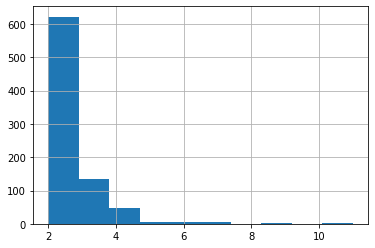

In [21]:
df_train["speaker_num"].hist()
plt.show()

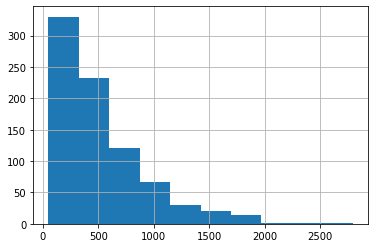

In [22]:
df_train["dialogue_len"].hist()
plt.show()

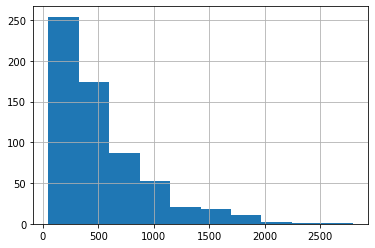

In [23]:
df_train[df_train["speaker_num"]==2]["dialogue_len"].hist()

In [24]:
df_train[(df_train["speaker_num"]==2)&(df_train["dialogue_len"]<=512)]

,id,summary,dialogue,speaker_num,dialogue_len
0,13862856,Hannah needs Betty's number but Amanda doesn't...,"Hannah: Hey, do you have Betty's number?\nAman...",2,407
1,13729565,Eric and Rob are going to watch a stand-up on ...,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,2,459
3,13729438,Emma will be home soon and she will let Will k...,"Will: hey babe, what do you want for dinner to...",2,461
7,13814882,Rita and Tina are bored at work and have still...,Rita: I'm so bloody tired. Falling asleep at w...,2,439
8,13680876,"Beatrice wants to buy Leo a scarf, but he does...","Beatrice: I am in town, shopping. They have ni...",2,479
...,...,...,...,...,...
801,13680539,Tim is running late and will arrive around twe...,Tim: I'm running late\r\nGary: when will you b...,2,171
804,13809941,Louisa will lend Thelma her red velvet dress.,Thelma: i dont have anything to wear\r\nLouisa...,2,235
805,13728877,Megan and Joseph will take Joseph's car to the...,Megan: Are we going to take a taxi to the oper...,2,123
806,13729234,Carl is waiting for Meg who's running late as ...,Carl: Where are u?\r\nCarl: I'm still waiting ...,2,111


2     622
3     134
4      47
5       6
7       4
6       4
11      1
9       1
Name: speaker_num, dtype: int64


<BarContainer object of 8 artists>

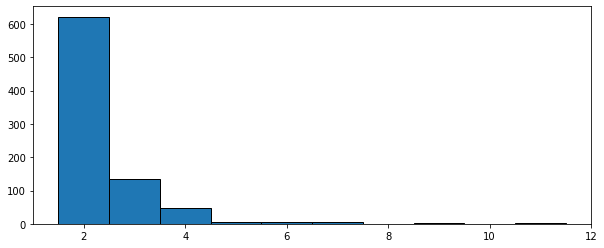

In [25]:
freq = df_train['speaker_num'].value_counts()
print(freq)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,1,1)
ax.bar(freq.keys(), freq, width=1.0, alpha=1, edgecolor='black', linewidth=1.0)

<BarContainer object of 27 artists>

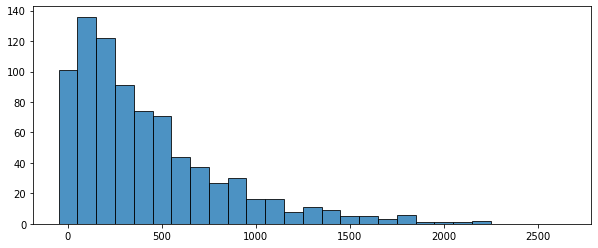

In [26]:
freq = df_train.groupby(pd.cut(df_train["dialogue_len"], np.arange(df_train["dialogue_len"].min(), df_train["dialogue_len"].max(), 100)))["dialogue_len"].size()
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,1,1)
ax.bar([x*100 for x in range(0, len(freq.index))], freq.values, width=1.0*100, alpha=0.8, edgecolor='black', linewidth=1.0)


In [27]:
len(freq.index)

27

In [28]:
df_train[df_train["speaker_num"]==1]['summary']

Series([], Name: summary, dtype: object)

In [29]:
df_train.to_csv(os.path.join(corpus_dir,"train.tsv"), sep='\t')